<a href="https://colab.research.google.com/github/bdrinconp/ml_chain_ladder/blob/main/model/ml_chain_ladder_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entendimiento de los datos

Los datos asociados a este proyecto se han obtenido desde la web de la CAS (Casualty Actuarial Society), para esto la CAS obtuvo datos a través de la base de datos de la NAIC (National Association of Insurance Commissioners).

Para este proyecto se hace uso del conjunto de datos asociado a Responsabilidad civil de producto (Product Liability Data Set), este conjunto de datos se encuentra disponible en el repositorio del proyecto en github.

Estos datos se encuentran almacenados un archivo .csv y no poseen relación con otra fuente de datos.

## Librerias

In [1]:
#importe de librerías
#===============================================================================
import pandas as pd
import numpy as np
#===============================================================================
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#===============================================================================
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
#===============================================================================
import time
from ipywidgets import interact

## Importar datos




En esta sección se realiza importan los datos, los cuales se encuentran disponibles en el repositorio de [github](https://github.com/bdrinconp/ml_actuaria) del proyecto. Es importante tener en cuenta que se realiza  importan los datos desde la URL de los datos crudos.

### Descripción de los datos

**GRCODE:** Código de la compañía NAIC (National Association of Insurance Commissioners), que incluye tanto grupos de aseguradoras como aseguradoras individuales.

**GRNAME:** Nombre de la compañía NAIC, que incluye tanto grupos de aseguradoras como aseguradoras individuales.  

**AccidentYear:** Año de ocurrencia de las reclamaciones. Este va desde 1988 hasta 1997.

**DevelopmentYear:** Año de desarrollo de las reclamaciones. También varía de 1988 a 1997.

**DevelopmentLag:** Rezago de desarrollo de las reclamaciones, calculado como (AccidentYear - 1987) + (DevelopmentYear - 1987) - 1.

**IncurLoss_:** Pérdidas incurridas y gastos asignados reportados al final del año.

**CumPaidLoss_:** Pérdidas pagadas acumuladas y gastos asignados al final del año.

**BulkLoss_:** Reservas masivas (Bulk) e IBNR (Incurred But Not Reported) sobre pérdidas netas y gastos de defensa y costos de contención informados al final del año.

**PostedReserve97_:** Reservas publicadas en el año 1997, tomadas del "Underwriting and Investment Exhibit – Part 2A," incluyendo pérdidas netas no pagadas y gastos de ajuste no pagados.

**EarnedPremDIR_:** Primas devengadas en el año de ocurrencia, tanto directas como asumidas.

**EarnedPremCeded_:** Primas devengadas en el año de ocurrencia, cedidas a reaseguradores.

**EarnedPremNet_:** Primas devengadas en el año de ocurrencia, netas (directas menos cedidas).

**Single:** Indicador que toma el valor 1 si se trata de una entidad única y 0 si se trata de una aseguradora del grupo.




In [2]:
#importar datos
#===============================================================================
url_data = 'https://raw.githubusercontent.com/bdrinconp/ml_actuaria/main/data/prodliab_pos.csv'
#'https://raw.githubusercontent.com/bdrinconp/ml_chain_ladder/main/data/comauto_pos.csv'
df = pd.read_csv(url_data)
df['Single'] = df['Single'].astype(str)

In [3]:
#datos
#===============================================================================
df.columns = ['GRCODE',	'GRNAME',	'AccidentYear',	'DevelopmentYear',	'DevelopmentLag',	'IncurLoss',	'CumPaidLoss',	'BulkLoss',	'EarnedPremDIR',	'EarnedPremCeded',	'EarnedPremNet',	'Single',	'PostedReserve97']
df.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet,Single,PostedReserve97
0,78,Federated Mut Grp,1988,1988,1,29483,3894,18410,29513,0,29513,0,86660
1,78,Federated Mut Grp,1988,1989,2,28826,7409,13495,29513,0,29513,0,86660
2,78,Federated Mut Grp,1988,1990,3,27063,11199,7770,29513,0,29513,0,86660
3,78,Federated Mut Grp,1988,1991,4,26001,16913,4721,29513,0,29513,0,86660
4,78,Federated Mut Grp,1988,1992,5,24614,18517,2984,29513,0,29513,0,86660


### Descripción de variables y calidad

**Revisión de valores unícos**

En este apartado se realiza la revisión de valores unicos por cada variable disponble en el conjunto de datos. Esto permite identificar columnas de comportamiento númerico (cuantitativas) y las de comportamiento categorico (cualitativas).

In [4]:
#===============================================================================
for col in df.columns:
  print(f"{col}: {df[col].nunique()} valores unicos")

GRCODE: 70 valores unicos
GRNAME: 70 valores unicos
AccidentYear: 10 valores unicos
DevelopmentYear: 19 valores unicos
DevelopmentLag: 10 valores unicos
IncurLoss: 1417 valores unicos
CumPaidLoss: 1122 valores unicos
BulkLoss: 821 valores unicos
EarnedPremDIR: 425 valores unicos
EarnedPremCeded: 240 valores unicos
EarnedPremNet: 392 valores unicos
Single: 2 valores unicos
PostedReserve97: 50 valores unicos


**Reisión de valores nulos**

Ahora, se realiza la revisión de de valores nulos al interior del conjunto de datos. Se observa que no existen valores nulos en ninguna de las columnas.


In [5]:
#===============================================================================
df.isnull().sum()

GRCODE             0
GRNAME             0
AccidentYear       0
DevelopmentYear    0
DevelopmentLag     0
IncurLoss          0
CumPaidLoss        0
BulkLoss           0
EarnedPremDIR      0
EarnedPremCeded    0
EarnedPremNet      0
Single             0
PostedReserve97    0
dtype: int64

**Resumen de variables númericas**

Con base en lo analizado en a través de los valores unicos, se identifican como variables númericas las siguentes:

* IncurLoss
* CumPaidLoss
* BulkLoss
* EarnedPremDIR
* EarnedPremCeded
* EarnedPremNet

Para estas variables se realiza un análisis descriptivo básico identificando medidas de tendencia, posición y dispersión.

In [6]:
#===============================================================================
num_cols = ['IncurLoss', 'CumPaidLoss', 'BulkLoss', 'EarnedPremDIR', 'EarnedPremCeded', 'EarnedPremNet']
df[num_cols].describe().round(2)

,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet
count,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00
mean,2133.64,1262.71,463.16,3908.30,618.72,3289.57
std,10837.22,7437.60,3433.73,18108.13,3307.02,15112.64
min,-504.00,-862.00,-423.00,-12.00,-90.00,-22.00
25%,0.00,0.00,0.00,5.00,0.00,3.00
50%,5.00,1.00,0.00,120.00,7.00,84.50
75%,249.00,121.25,8.00,1031.00,92.00,650.25
max,142234.00,129300.00,87677.00,185016.00,39845.00,150180.00


**Análisis de variables categóricas**

Al igual en el caso anterior se identifican las siguentes variables categóricas:

* AccidentYear
* DevelopmentYear
* DevelopmentLag
* Single

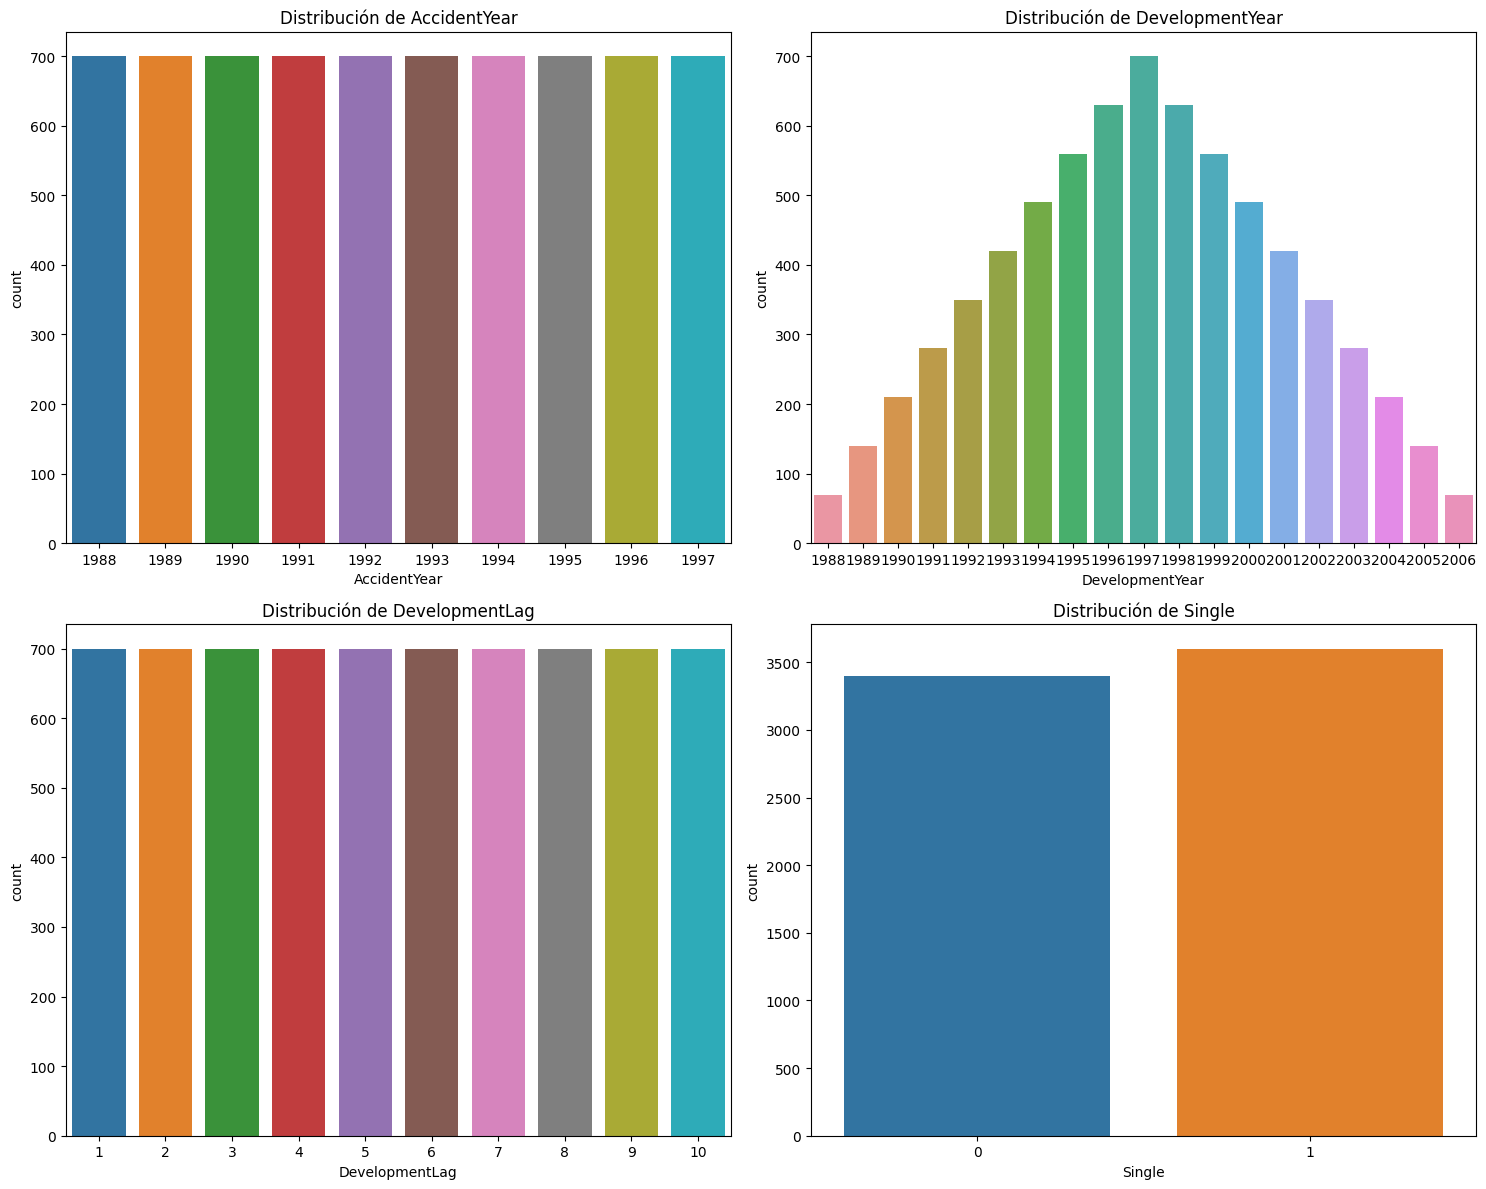

In [7]:
#===============================================================================
cat_cols = ['AccidentYear', 'DevelopmentYear', 'DevelopmentLag', 'Single']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 filas, 2 columnas
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

## EDA (Exploratory Data Analysis)

Ahora, se realiza un analisis exploratorio considerando como variables de interes las variables *IncurLoss* y *CumPaidLoss*, las cuales poseen la siguiente descripción:

**Perdidas incurridas (IncurLoss)**

Las perdidas incurridas representan el total estimado de costos que una compañia de seguros espera tener que pagar debido a siniestros que han ocurrido durante un período de tiempo especifico. Esto incluye tanto los pagos que yan se han hecho como las estimaciones de los pagos futuros relacionados con esos siniestros. También puede incluir gastos asignados como costos legales.

**Pérdidas pagadas acumuladas (CumPaidLoss)**
Las pérdidas pagadas acumuladas son aquellas que efectivamente se han pagado durante un periodo de tiempo especifico. Estos son desembolsos reales que la compañia de seguros ha realizado para cubrir las reclamaciones de los asegurados.

### Análisis por año del accidente

En este primer analisis se realiza la comparativa general de las perdidas incurridas y las perdidas acumuladas, se observa que en general las perdidas incurridas son superiores a las perdidas pagadas, esto tiene sentido debido a diferentes motivos:

1. Tiempo de desarrollo: Los siniestros pueden tomar tiempo en ser reportados, procesados y finalmente pagados.
2. Incentidumbre en las estimaciones: Las pérdidas incurridas a menudo son estimaciones que pueden ajustarse con el tiempo a medida que se recopila más información sobre las reclamaciones.

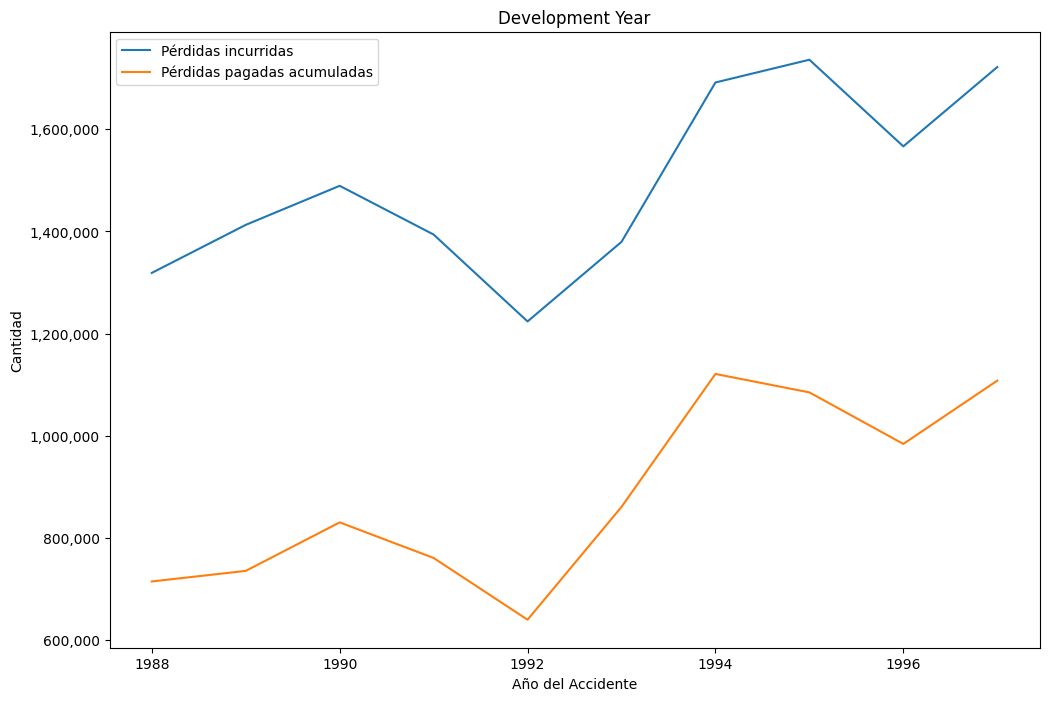

In [8]:
#===============================================================================
grouped_year_data = df.groupby('AccidentYear')[['IncurLoss', 'CumPaidLoss']].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=grouped_year_data, x='AccidentYear', y='IncurLoss', label='Pérdidas incurridas')
sns.lineplot(data=grouped_year_data, x='AccidentYear', y='CumPaidLoss', label='Pérdidas pagadas acumuladas')
ax.set_title('Development Year')
ax.set_xlabel('Año del Accidente')
ax.set_ylabel('Cantidad')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend()
plt.show()

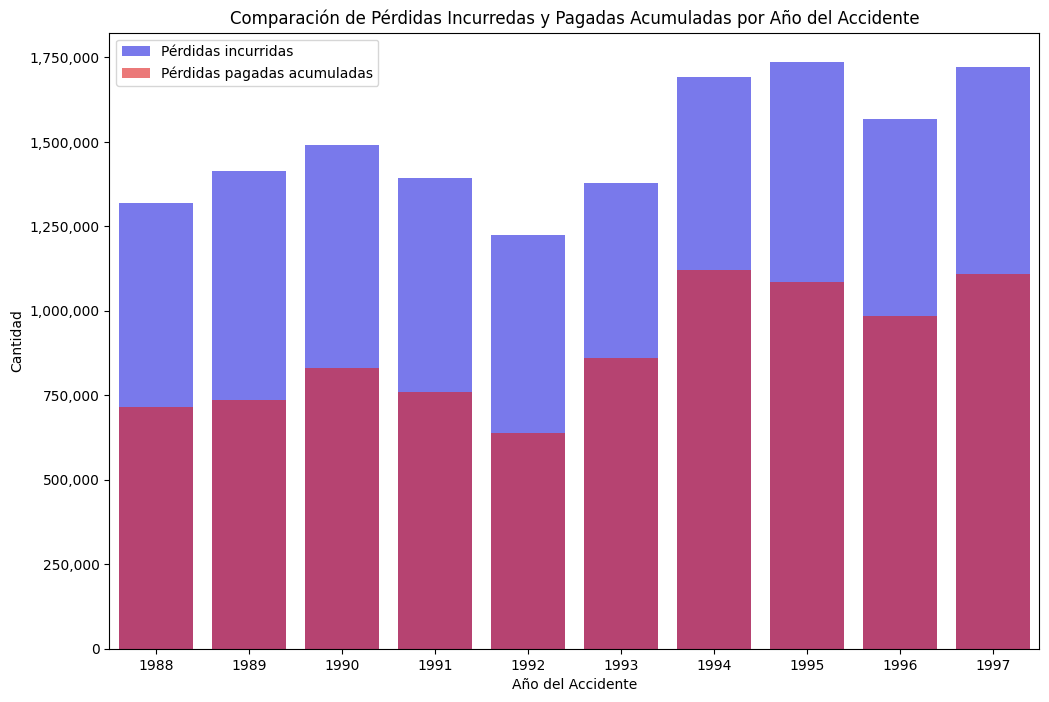

In [9]:
#===============================================================================
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=grouped_year_data, x='AccidentYear', y='IncurLoss', color='b', alpha=0.6, label='Pérdidas incurridas')
sns.barplot(data=grouped_year_data, x='AccidentYear', y='CumPaidLoss', color='r', alpha=0.6, label='Pérdidas pagadas acumuladas')
ax.set_title('Comparación de Pérdidas Incurredas y Pagadas Acumuladas por Año del Accidente')
ax.set_xlabel('Año del Accidente')
ax.set_ylabel('Cantidad')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend()
plt.show()

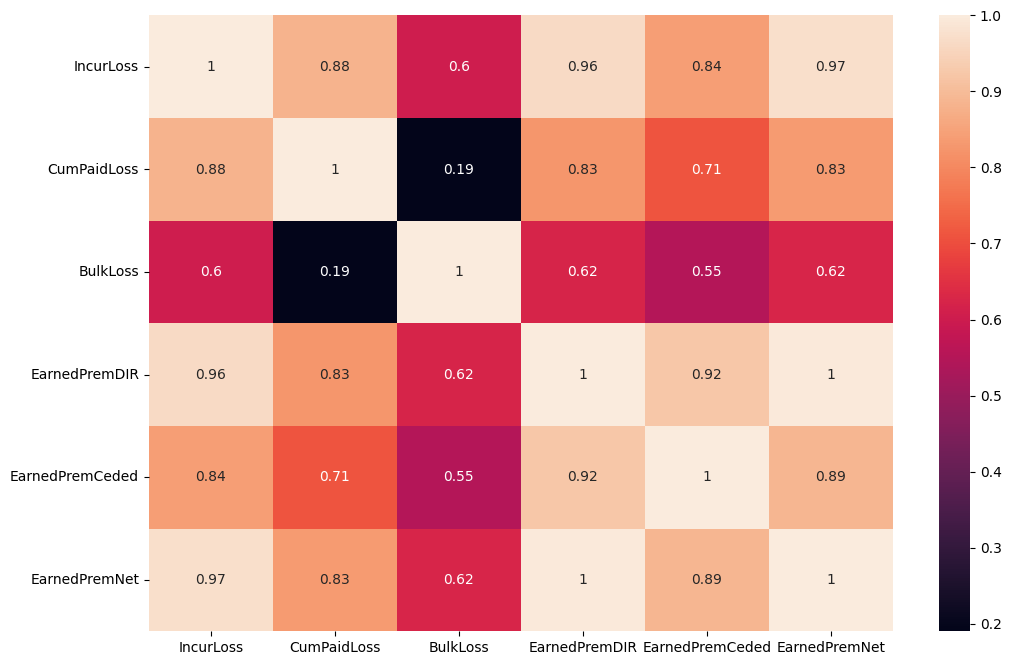

In [10]:
#===============================================================================
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot = True)
plt.show()

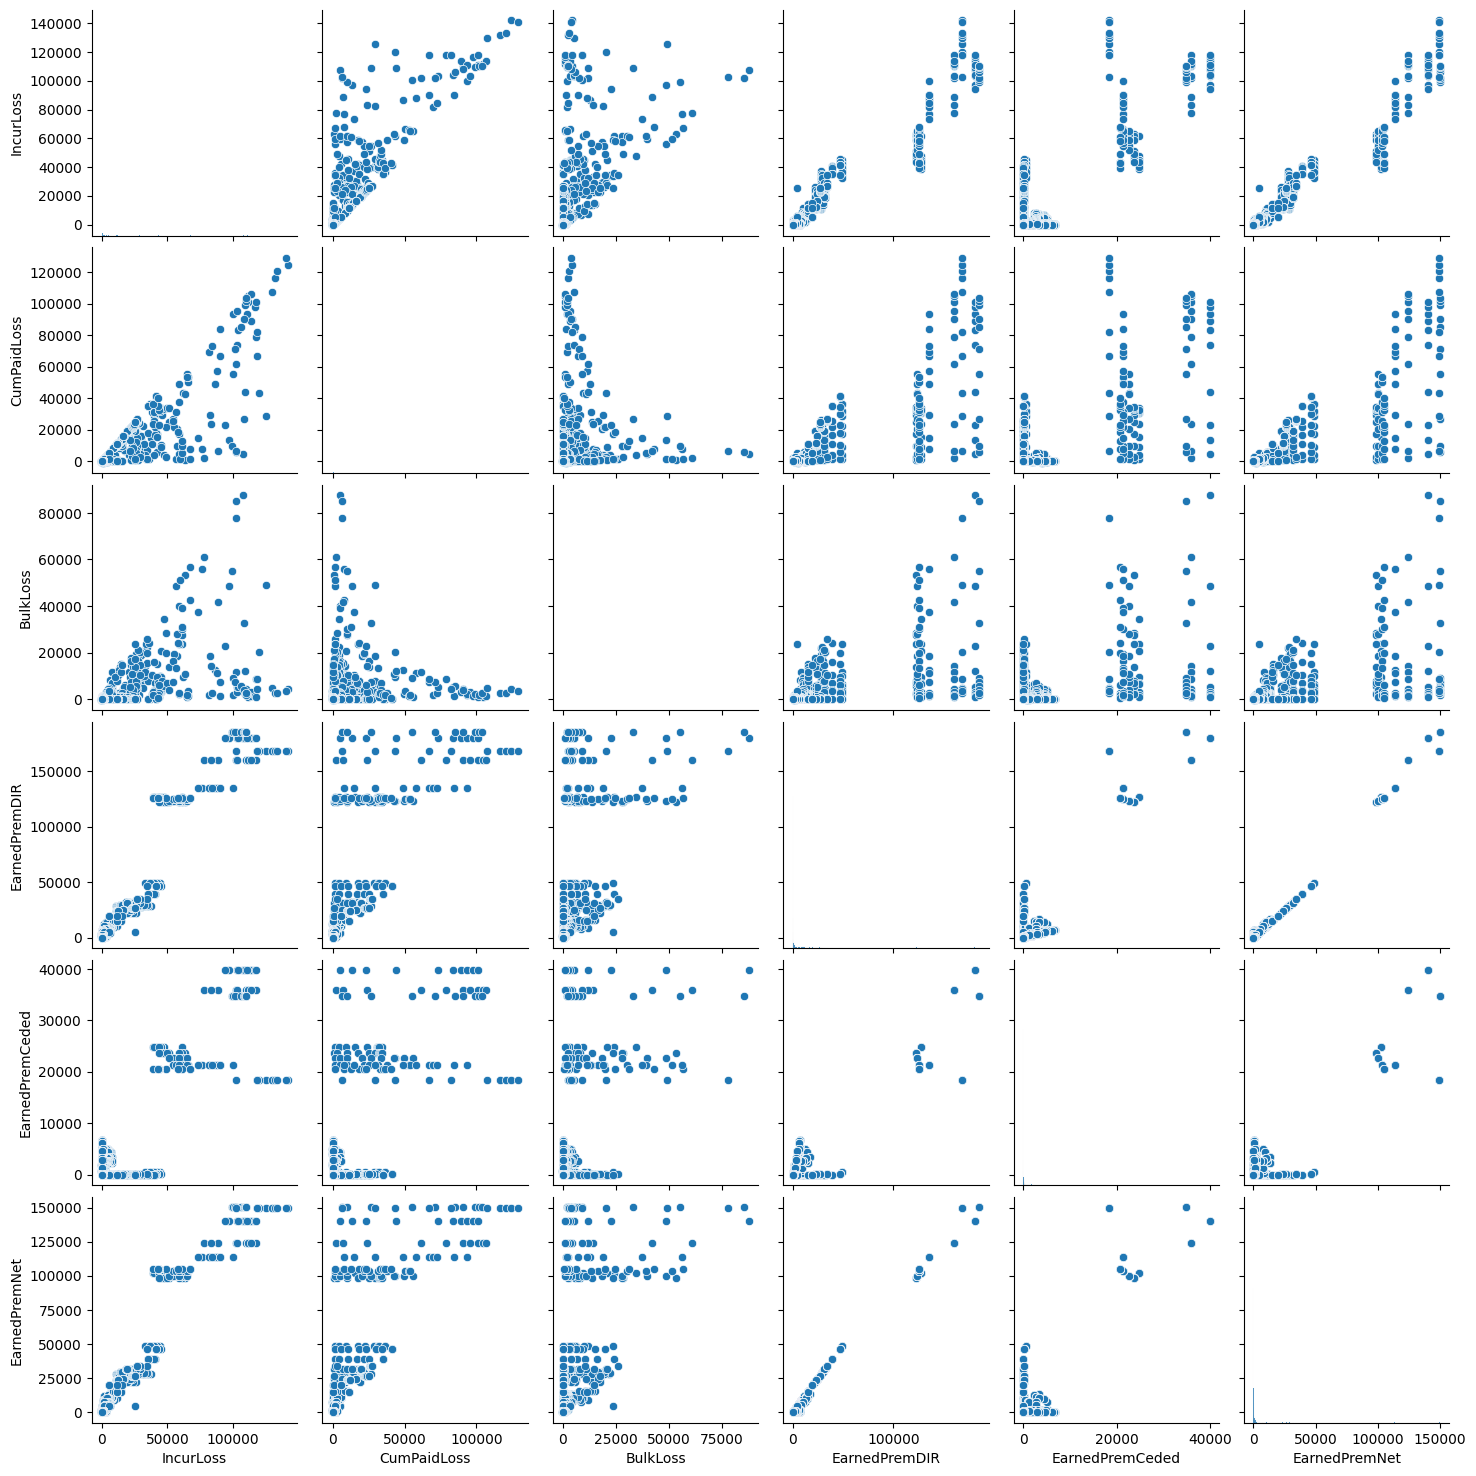

In [11]:
#===============================================================================
sns.pairplot(df[num_cols])

**Observaciones:**

1. Las perdidas incurridas son inferiores a las perdidas pagadas, esto se debe a que por lo general las compañias aseguradoras suelen a reservar un mayor valor de incurrido respecto al pago final de los siniestros.

2. Se observa una tendencia creciente en el tiempo en los montos incurridos y pagados.

3. Los valores incurridos y pagados estan altamente correlacionados con las primas.

In [12]:
#===============================================================================
singles = ['Todos'] + list(df.Single.unique())
topN = [5,10,15,20,30]

@interact
def plot_incur_company_single(Single = singles, N = topN):
  grouped_company_data = df.groupby(['GRNAME','Single'])[['IncurLoss','CumPaidLoss']].sum().reset_index()
  grouped_company_data = grouped_company_data.sort_values('IncurLoss', ascending=False)

  if Single != 'Todos':
    grouped_company_data = grouped_company_data[grouped_company_data.Single == Single]

  grouped_company_data_N = grouped_company_data.nlargest(N, 'IncurLoss')

  fig, ax = plt.subplots(figsize = (15,6))
  sns.barplot(x='IncurLoss', y='GRNAME', data=grouped_company_data_N, orient='h', color='b', alpha=0.6)
  sns.barplot(x='CumPaidLoss', y='GRNAME', data=grouped_company_data_N, orient='h', color='r', alpha=0.6)
  ax.set_title('Comparación de Reservas Incurredas por Grupo Asegurador')
  ax.set_xlabel('Reservas Incurridas')
  ax.set_ylabel('Nombre compañia')
  ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
  plt.show()

interactive(children=(Dropdown(description='Single', options=('Todos', '0', '1'), value='Todos'), Dropdown(des…

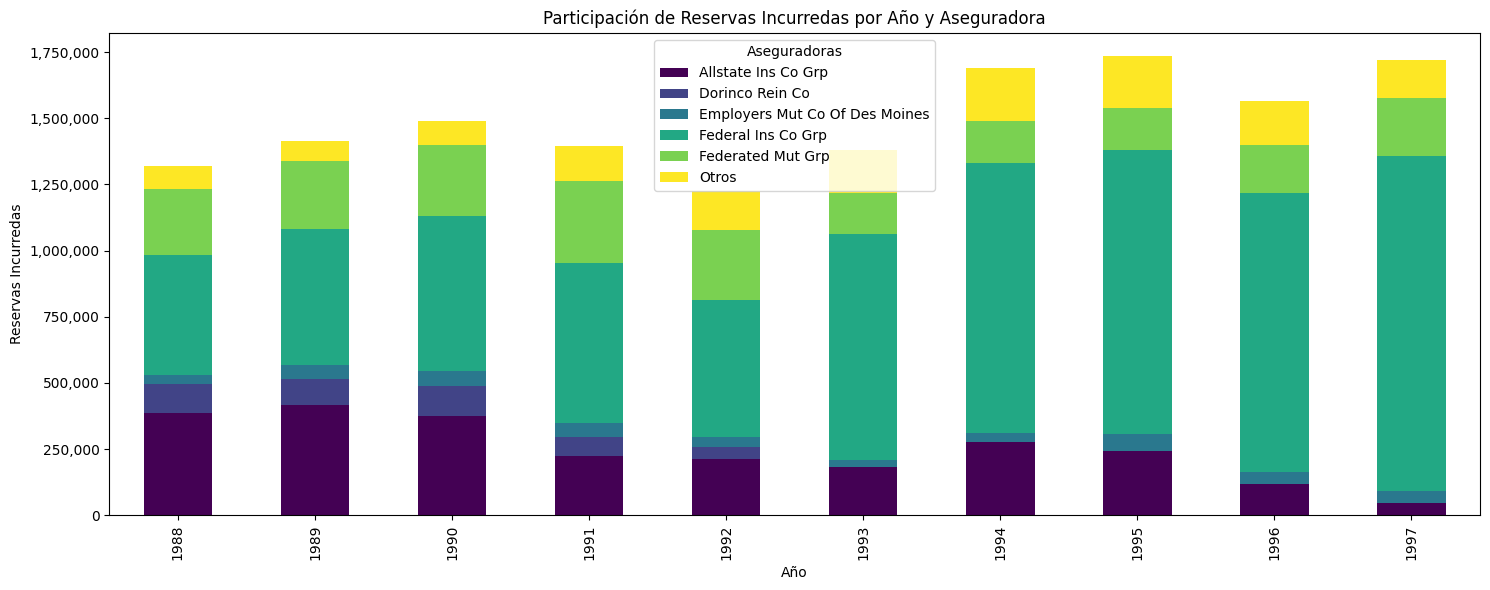

In [13]:
#===============================================================================
# Identificar las top 5 aseguradoras en términos de 'IncurLoss'
top_5 = df.groupby('GRNAME')['IncurLoss'].sum().nlargest(5).index.tolist()

# Crear una nueva columna para identificar las aseguradoras que no están en el top 5 y agruparlas como 'Otros'
df['Grouped_GRNAME'] = df['GRNAME'].apply(lambda x: x if x in top_5 else 'Otros')

# Agrupar los datos
grouped_data = df.groupby(['Grouped_GRNAME', 'AccidentYear'])['IncurLoss'].sum().reset_index()

# Reorganizar el DataFrame
pivot_data = grouped_data.pivot(index='AccidentYear', columns='Grouped_GRNAME', values='IncurLoss').fillna(0)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

ax.set_title('Participación de Reservas Incurredas por Año y Aseguradora')
ax.set_ylabel('Reservas Incurredas')
ax.set_xlabel('Año')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.legend(title='Aseguradoras')
plt.show()


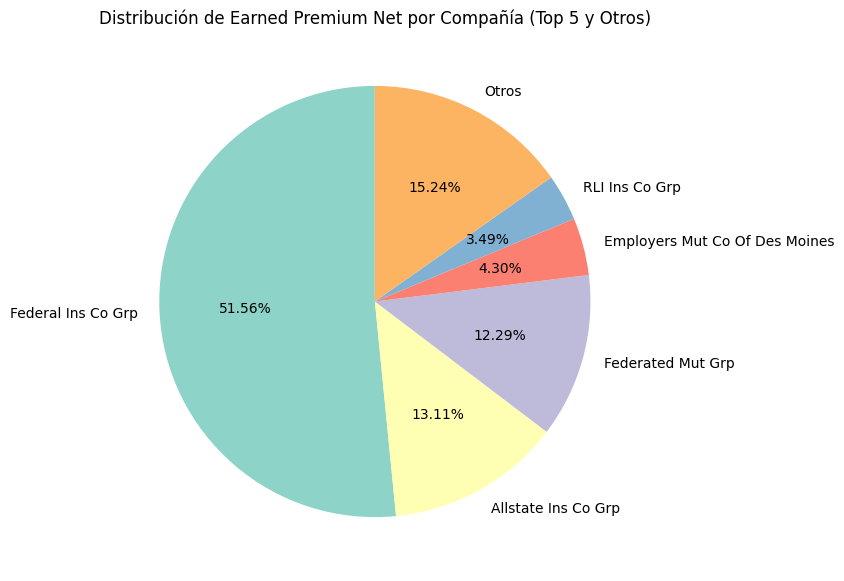

In [14]:
#===============================================================================
# Agrupar las compañías por 'GRNAME' y sumar 'EarnedPremNet'
grouped_companies = df.groupby('GRNAME')['EarnedPremNet'].sum().sort_values(ascending=False).reset_index()

# Seleccionar el top 5 y agrupar las demás como 'otros'
top_5 = grouped_companies.head(5)
otros = grouped_companies.iloc[5:].sum(numeric_only=True)
otros['GRNAME'] = 'Otros'
combined_data = pd.concat([top_5, otros.to_frame().T], ignore_index=True)

# Gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(combined_data['EarnedPremNet'], labels=combined_data['GRNAME'], autopct='%1.2f%%', startangle=90, colors=sb.color_palette("Set3", n_colors=6))
plt.title('Distribución de Earned Premium Net por Compañía (Top 5 y Otros)')
plt.show()


**Observaciones:**

1. Se identifica el top 5 de aseguradoradoras con mayor reservas incurridas. Y dado que existe una correlación linal fuerte entre las reservas y las primas el objetivo es identificar las compañias de seguros que mayor porcentaje de primas poseen.


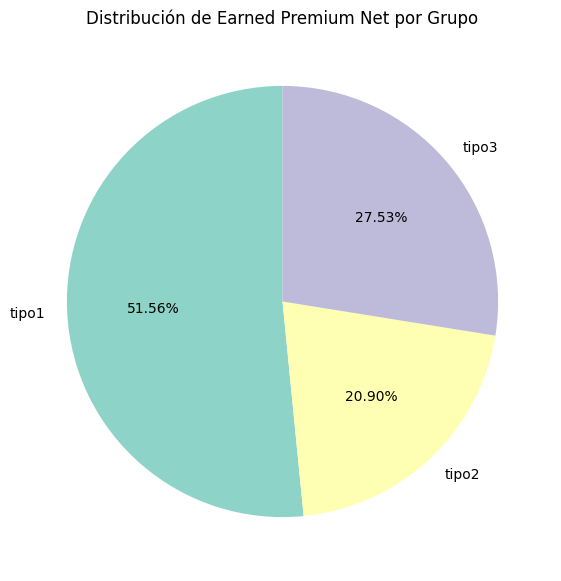

In [15]:
#===============================================================================
# Definir el mapeo de grupos según las especificaciones dadas
grupo_mapping = {
    'Federal Ins Co Grp': 'tipo1',
    'Allstate Ins Co Grp': 'tipo2',
    'Federate Mut Grp': 'tipo2',
    'RLI Ins Co Grp': 'tipo2',
    'Employers Mut Co Of Des Moines': 'tipo2'
}

# Crear una nueva columna en el DataFrame para asignar el tipo correspondiente
df['grupo'] = df['GRNAME'].map(grupo_mapping).fillna('tipo3')

# Agrupar por 'grupo' y sumar 'EarnedPremNet'
grouped_data = df.groupby('grupo')['EarnedPremNet'].sum().reset_index()

# Gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(grouped_data['EarnedPremNet'], labels=grouped_data['grupo'], autopct='%1.2f%%', startangle=90, colors=sb.color_palette("Set3", n_colors=3))
plt.title('Distribución de Earned Premium Net por Grupo')
plt.show()


# Construcción de la tabla de modelamiento

Teniendo en cuenta que nuestro objetivo es hacer uso de modelos de aprendizaje automático, los cuales no están diseñados para soportar la estructura de datos triangular típica de los siniestros, se procede a la construcción de un dataframe denominado “df_model”. Este dataframe incluye las siguientes columnas: GRCODE (código de grupo de riesgo), GRNAME (nombre del grupo de riesgo), AccidentYear (año del accidente), DevelopmentYear (año de desarrollo) y DevelopmentLag (retraso de desarrollo). Se efectúa también una limpieza de datos, excluyendo aquellas aseguradoras que reportan reservas incurridas (IncurrLoss) negativas, lo cual resulta en la selección de 17 aseguradoras de un total de 70. A pesar de esta reducción, es relevante señalar que las 17 aseguradoras seleccionadas representan el 90% del valor incurrido total, lo que indica que el conjunto de datos resultante sigue siendo representativo para el análisis.     

También es importante precisar que los valores negativos no implican necesariamente errores en los datos. En la actividad habitual de las aseguradoras, estos valores negativos pueden representar liberaciones de reserva, es decir, situaciones en las cuales fondos son reintegrados a la contabilidad de la compañía.


In [16]:
#===============================================================================
features = ['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag','IncurLoss']
drop_aseg = df[df['IncurLoss'] <= 0]["GRCODE"].unique()
df_model = df[~df["GRCODE"].isin(drop_aseg)]
df_model = df_model[features]

print(df_model.shape)
df_model.head()

(1700, 6)


,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss
0,78,Federated Mut Grp,1988,1988,1,29483
1,78,Federated Mut Grp,1988,1989,2,28826
2,78,Federated Mut Grp,1988,1990,3,27063
3,78,Federated Mut Grp,1988,1991,4,26001
4,78,Federated Mut Grp,1988,1992,5,24614


In [17]:
# Aseguradoras eliminadas
#===============================================================================
len(drop_aseg)

53

In [18]:
# Aseguradoras para modelizar
#===============================================================================
df_model['GRCODE'].nunique()

17

## Implementación ChainLadder

El método Chain Ladder es una técnica actuarial utilizada para estimar las reservas necesarias para pagar reclamaciones futuras en seguros, particularmente en el segmento de seguros de daños y accidentes. Se basa en la premisa de que los patrones históricos de pago de reclamaciones proporcionan una base sólida para predecir futuros pagos. Este método utiliza un triángulo de desarrollo de reclamaciones, que es una tabla que muestra los pagos acumulados para diferentes años de ocurrencia y diferentes periodos de desarrollo.

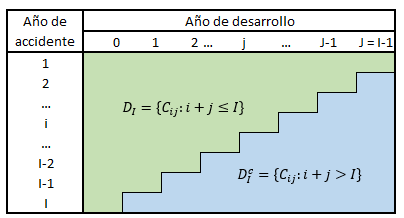


In [19]:
#===============================================================================
class ChainLadder:
    def __init__(self, table=pd.DataFrame(), accident_year="", development="", incurr_col="", index=""):

        self.table = table
        self.accident_year = accident_year
        self.development = development
        self.index = index
        self.incurr_col = incurr_col

    def Triangles(self):

        # Rename columns
        data = self.table.rename(columns={self.accident_year: "AccidentYear", self.development: "DevelopmentLag",
                                          self.incurr_col: "IncurLoss", self.index: "GRCODE"})

        all_triangles_dict = {}

        for k in data["GRCODE"].unique():

            filtered_data = data[data["GRCODE"] == k]

            # Create triangles
            full_triangle = filtered_data.pivot_table(values="IncurLoss", index="AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)

            accumulated_full_triangle = full_triangle.copy()

            num_rows = accumulated_full_triangle.shape[0]
            num_cols = accumulated_full_triangle.shape[1]

            half_triangle = full_triangle.copy()
            for i in range(num_rows):
                for j in range(1, i+1):
                    half_triangle.iloc[i, -j] = None

            for idx, i in enumerate(range(1, num_cols+1)):
                accumulated_full_triangle[full_triangle.columns[idx]] = full_triangle[full_triangle.columns[0:i]].sum(axis=1)

            accumulated_half_triangle = accumulated_full_triangle.copy()
            for i in range(num_rows):
                for j in range(1, i+1):
                    accumulated_half_triangle.iloc[i, -j] = None

            factors0 = accumulated_half_triangle.sum(axis=0)
            factors1 = accumulated_half_triangle.sum(axis=0) - np.flip(np.diag(np.fliplr(accumulated_half_triangle), 0))
            factors0 = factors0[1:10]
            factors1 = factors1[0:-1]
            factors = factors0.reset_index(drop=True) / factors1.reset_index(drop=True)

            estimated_triangle = accumulated_half_triangle.copy()
            for i in list(reversed(range(num_rows))):
                auxiliary = np.diag(np.fliplr(accumulated_half_triangle), 0)[i]
                for j in range(1, i+1):
                    estimated_triangle.iloc[i, -j] = auxiliary * factors.iloc[-i+9:-j+10].prod()

            total_reserve = sum(np.array(list(reversed(np.array(estimated_triangle[10])))) - np.flip(np.diag(np.fliplr(estimated_triangle), 0)))

            triangle_dict = {'full_triangle': full_triangle, "half_triangle": half_triangle, "accumulated_full_triangle": accumulated_full_triangle,
                             "accumulated_half_triangle": accumulated_half_triangle, "factors": factors, "estimated_triangle": estimated_triangle,
                             "total_reserve": total_reserve}

            name = k
            all_triangles_dict[name] = triangle_dict

        return all_triangles_dict


In [20]:
#===============================================================================
class ChainLadderShort:
    def __init__(self, table=pd.DataFrame(), accident_year="", development="", incurr_col ="", index=""):
        self.table = table
        self.accident_year = accident_year
        self.development = development
        self.index = index
        self.incurr_col = incurr_col

    def Triangles(self):
        data = self.table.rename(columns={self.accident_year: "AccidentYear", self.development: "DevelopmentLag",
                                          self.incurr_col: "IncurLoss", self.index: "GRCODE"})

        all_triangles_dict = {}

        for k in data["GRCODE"].unique():
            filtered_data = data[data["GRCODE"] == k]
            full_triangle = filtered_data.pivot_table(values="IncurLoss", index="AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)
            accumulated_full_triangle = full_triangle.copy()
            num_rows = accumulated_full_triangle.shape[0]
            num_columns = accumulated_full_triangle.shape[1]
            half_full_triangle = full_triangle.copy()

            for i in range(num_rows):
                for j in range(1, i + 1):
                    half_full_triangle.iloc[i, -j] = None

            triangle_dict = {'full_triangle': full_triangle, "half_triangle": half_full_triangle}
            name = k
            all_triangles_dict[name] = triangle_dict

        return all_triangles_dict

In [21]:
# Calculo
#===============================================================================
result = ChainLadder(table = df_model,
                         accident_year = "AccidentYear",
                         development = "DevelopmentLag",
                         incurr_col = 'IncurLoss',
                         index = "GRCODE")

Tresult = result.Triangles()

#===============================================================================
#aseg = 1
#Tresult[aseg]["full_triangle"]
#===============================================================================
#Tresult[aseg]["half_triangle"]
#===============================================================================
#Tresult[aseg]["accumulated_full_triangle"]
#===============================================================================
#Tresult[aseg]["accumulated_half_triangle"]
#===============================================================================
#Tresult[aseg]["factors"]
#===============================================================================
#Tresult[aseg]["estimated_triangle"]
#===============================================================================
#Tresult[aseg]["total_reserve"]

## Modelos

Nos enfocamos en la aplicación de regresiones lineal múltiple, ridge y lasso para predecir las reservas futuras. Estos modelos aprovechan como variables predictoras el lapso desde la ocurrencia del evento, conocido como lag de desarrollo, y el año en que ocurrió el accidente. La inclusión de estos factores es crucial para entender cómo los eventos pasados influyen en las estimaciones actuales y futuras, permitiendo una aproximación más ajustada y realista de las reservas necesarias para cubrir los siniestros pendientes.

In [22]:
#===============================================================================
data = df_model
size = Tresult[data["GRCODE"].unique()[0]]["accumulated_half_triangle"].shape[0]#10
size1 =  size**2 #100
size2 = (size1-size)/2 + size #55
cant_parametros = size*2-1 #19
matriz_de_ceros = np.zeros((size1, cant_parametros)) #matriz de ceros
matriz_de_ceros[:,0] = 1 #columna 0 se llene de unos
for i in range(size): #recorre las columnas
    for j in range(size): #recorre las filas
        k = i*10+j
        if i != 0:
            matriz_de_ceros[k,i] = 1
        if j != 0:
            matriz_de_ceros[k,j+9] = 1
matriz_de_ceros = pd.DataFrame(matriz_de_ceros)

In [23]:
#===============================================================================
class Reserva_Regresion_lineal:

    def __init__(self,
                table = pd.DataFrame(),
                accident_year = "",
                development = "",
                incurr_col = "",
                index = "",
                alpha = 1,
                zero_matrix = pd.DataFrame()):

      self.table = table
      self.accident_year = accident_year
      self.development = development
      self.index = index
      self.incurr_col = incurr_col
      self.alpha = alpha
      self.zero_matrix = zero_matrix

    def Regresion_lineal(self):

        datos = self.table.rename(columns={self.accident_year: "AccidentYear",
                                           self.development: "DevelopmentLag",
                                           self.incurr_col: "IncurLoss",
                                           self.index: "GRCODE"})

        resultados = ChainLadderShort(table=datos,
                                      accident_year="AccidentYear",
                                      development="DevelopmentLag",
                                      incurr_col="IncurLoss",
                                      index="GRCODE")

        triangulos_resultados = resultados.Triangles()

        Y = pd.DataFrame()
        Y_completo = pd.DataFrame()
        matriz_X = pd.DataFrame()
        for i in datos["GRCODE"].unique():
            triangulo = triangulos_resultados[i]["half_triangle"]
            triangulo_completo = triangulos_resultados[i]["full_triangle"]
            triangulo_log =  np.log(triangulo)
            triangulo_completo_log = np.log(triangulo_completo)
            vector_Y = pd.melt(triangulo_log)
            vector_Y_completo = pd.melt(triangulo_completo_log)
            vector_Y["GRCODE"] = i
            Y = pd.concat([Y,vector_Y], axis = 0)
            Y_completo = pd.concat([Y_completo,vector_Y_completo], axis = 0)
            matriz_X = pd.concat([matriz_X, self.zero_matrix], axis = 0)

        matriz_X = matriz_X.reset_index(drop=True)
        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        matriz_regresion = pd.concat([Y[["value", "GRCODE"]], Y_completo, matriz_X], axis = 1)
        matriz_regresion1 = matriz_regresion[~matriz_regresion["value"].isnull()]
        matriz_regresion1.columns = ['Z', "GRCODE", "Z_completo", "u", "alpha1", "alpha2", "alpha3", "alpha4", "alpha5",
                                    "alpha6", "alpha7", "alpha8", "alpha9", "beta1", "beta2", "beta3",
                                    "beta4", "beta5", "beta6", "beta7", "beta8", "beta9"]
        X = matriz_regresion1.iloc[:,3:]
        Y = matriz_regresion1.iloc[:,0]

        self.Regresion_lineal1 = LinearRegression()
        self.Regresion_lineal1.fit(np.array(X), np.array(Y))
        self.B = self.Regresion_lineal1.coef_

        self.ridge_model = Ridge(alpha = self.alpha)
        self.ridge_model.fit(np.array(X), np.array(Y))
        self.B_ridge_1 = self.ridge_model.coef_

        self.lasso_model = Lasso(alpha = self.alpha)
        self.lasso_model.fit(np.array(X), np.array(Y))
        self.B_lasso = self.lasso_model.coef_

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados = {"coeficientes":coeficientes, "X":X, "Y": Y}
        return diccionario_resultados


    def predict(self, datos_new):
        datos_new = datos_new.rename(columns={self.accident_year: "AccidentYear", self.development: "DevelopmentLag", self.incurr_col: "IncurLoss", self.index: "GRCODE"})
        resultados = ChainLadderShort(table=datos_new, accident_year="AccidentYear", development="DevelopmentLag", incurr_col="IncurLoss", index="GRCODE")
        triangulos_resultados = resultados.Triangles()

        i = datos_new["GRCODE"].unique()[0]
        triangulo = triangulos_resultados[i]["half_triangle"]
        triangulo_completo = triangulos_resultados[i]["full_triangle"]
        triangulo_log =  np.log(triangulo)
        triangulo_completo_log = np.log(triangulo_completo)
        vector_Y = pd.melt(triangulo_log)
        vector_Y_completo = pd.melt(triangulo_completo_log)
        vector_Y["GRCODE"] = i
        Y = vector_Y
        Y_completo = vector_Y_completo

        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        X = self.zero_matrix

        matriz_new = pd.concat([Y[["value", "GRCODE"]], Y_completo, X], axis = 1)
        matriz_new = matriz_new.reset_index(drop=True)

        Y_test = matriz_new[matriz_new["value"].isnull()].iloc[:,2]
        X_test = matriz_new[matriz_new["value"].isnull()].iloc[:,3:]


        Y_Ajustado = self.Regresion_lineal1.predict(X_test)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)

        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        comparacion["GRCODE"] = np.array(i)


        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()


        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados_test = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        metricas_model1 = pd.DataFrame(metricas_MAPE, index = [0]).T
        metricas_model1.index = ['MAPE', 'MAPE_ridge_1', 'MAPE_lasso']
        metricas_model1.columns = ["MAPE"]
        mejor_modelo = metricas_model1[metricas_model1["MAPE"] == metricas_model1["MAPE"].sort_values()[0]]


        modelo = {'MAPE':self.Regresion_lineal1, 'MAPE_ridge_1':self.ridge_model , 'MAPE_lasso':self.lasso_model}
        coeficientes_orden = {'MAPE':"Coef_normal", 'MAPE_ridge_1':"Coef_ridge1" , 'MAPE_lasso':"Coef_lasso"}
        nombres_orden = {'MAPE':"Regresión normal", 'MAPE_ridge_1':"Regresión de Ridge" , 'MAPE_lasso':"Regresión de Lasso"}
        nombre_mejor_modelo = mejor_modelo.index[0]


        self.mejor_modelo_resultado = {"nombre mejor modelo":  nombres_orden[nombre_mejor_modelo],
                                       "MAPE mejor modelo":metricas_MAPE[nombre_mejor_modelo],
                                       "coeficientes mejor modelo": coeficientes[coeficientes_orden[nombre_mejor_modelo]],
                                       "mejor modelo":modelo[nombre_mejor_modelo]}


        return diccionario_resultados_test, self.mejor_modelo_resultado

    def predict_test(self, datos_test):

        datos_new = datos_test.rename(columns={self.accident_year: "AccidentYear",
                                                   self.development: "DevelopmentLag",
                                                   self.incurr_col: "IncurLoss",
                                                   self.index: "GRCODE"})

        resultados = ChainLadderShort(table = datos_new,
                                      accident_year = "AccidentYear",
                                      development = "DevelopmentLag",
                                      incurr_col = "IncurLoss",
                                      index = "GRCODE")

        triangulos_resultados = resultados.Triangles()

        i = datos_new["GRCODE"].unique()[0]
        triangulo = triangulos_resultados[i]["half_triangle"]
        triangulo_completo = triangulos_resultados[i]["full_triangle"]
        triangulo_log =  np.log(triangulo)
        triangulo_completo_log = np.log(triangulo_completo)
        vector_Y = pd.melt(triangulo_log)
        vector_Y_completo = pd.melt(triangulo_completo_log)
        vector_Y["GRCODE"] = i
        Y = vector_Y
        Y_completo = vector_Y_completo

        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        X = self.zero_matrix

        matriz_new = pd.concat([Y[["value", "GRCODE"]], Y_completo, X], axis = 1)
        matriz_new = matriz_new.reset_index(drop=True)

        Y_test = matriz_new[matriz_new["value"].isnull()].iloc[:,2]
        X_test = matriz_new[matriz_new["value"].isnull()].iloc[:,3:]

        Y_Ajustado = self.mejor_modelo_resultado["mejor modelo"].predict(X_test)

        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado]).T
        comparacion.columns = ["Y_test", "Y_ajustado modelo final"]
        #metrica
        comparacion["GRCODE"] = np.array(i)


        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado modelo final"])**2).mean()
        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado modelo final"])/comparacion["Y_test"]).mean()*100
        metricas_MSE = {"MSE modelo final":MSE}
        metricas_MAPE = {"MAPE modelo final":MAPE}

        resultados_modelo_final = {"nombre mejor modelo": self.mejor_modelo_resultado["nombre mejor modelo"],
                                   "Metricas MSE": metricas_MSE, "Metricas MAPE":metricas_MAPE,
                                   "coeficientes": self.mejor_modelo_resultado["coeficientes mejor modelo"],
                                   "Comparacion": comparacion, "X":X,
                                   "mejor modelo":self.mejor_modelo_resultado["mejor modelo"]}

        return resultados_modelo_final

In [24]:
df_filtrado_unico = df_model[df_model["GRCODE"] == df_model["GRCODE"].unique()[0]]
df_filtrado_unico1 = df_model[df_model["GRCODE"] == df_model["GRCODE"].unique()[1]]
df_model

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss
0,78,Federated Mut Grp,1988,1988,1,29483
1,78,Federated Mut Grp,1988,1989,2,28826
2,78,Federated Mut Grp,1988,1990,3,27063
3,78,Federated Mut Grp,1988,1991,4,26001
4,78,Federated Mut Grp,1988,1992,5,24614
...,...,...,...,...,...,...
6095,28258,Continental Natl Ind Co,1997,2002,6,335
6096,28258,Continental Natl Ind Co,1997,2003,7,335
6097,28258,Continental Natl Ind Co,1997,2004,8,335
6098,28258,Continental Natl Ind Co,1997,2005,9,335


## Diseño del *experimento*


Con el objetivo de evaluar el desempeño de los modelos ajustados, se emplea la técnica de validación cruzada. Dado el bajo número de observaciones, se recurre a la variante Leave-One-Out Cross Validation (LOOCV).

La imagen ilustra el procedimiento utilizado para realizar los experimentos de validación cruzada, con el fin de evaluar el rendimiento de los modelos. En cada iteración, se calcula el error asociado a la muestra de validación (validation set). Este proceso se repite 17 veces, correspondientes al número de aseguradoras en nuestro conjunto de datos. Al concluir todas las iteraciones, el modelo con el menor error medio cuadrático (MSE) o error absoluto porcentual medio (MAPE) promedio se considerará como el óptimo.

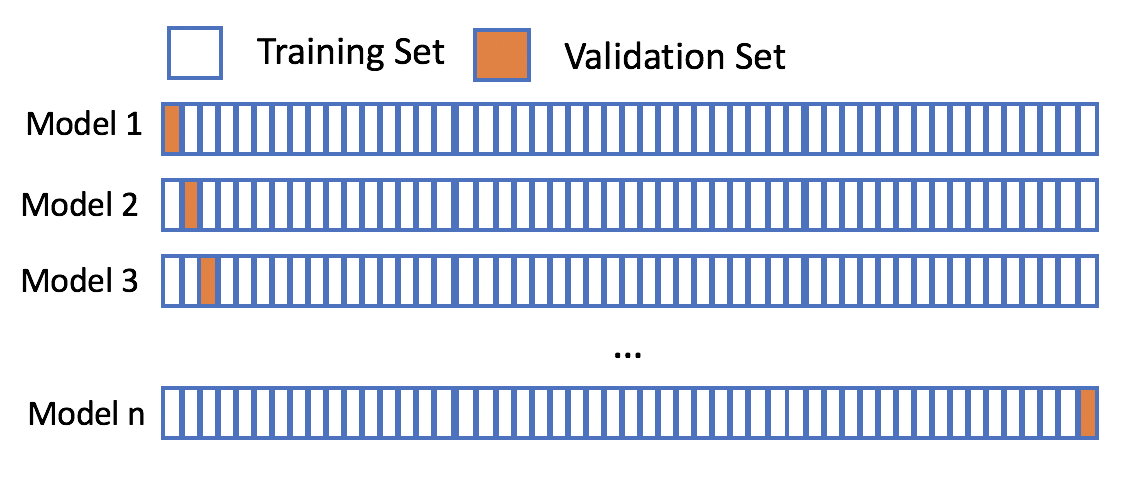

In [25]:
datos_CV = df_model[df_model["GRCODE"].isin(list(df_model["GRCODE"].unique()[0:17]))]

In [26]:
datos_CV

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss
0,78,Federated Mut Grp,1988,1988,1,29483
1,78,Federated Mut Grp,1988,1989,2,28826
2,78,Federated Mut Grp,1988,1990,3,27063
3,78,Federated Mut Grp,1988,1991,4,26001
4,78,Federated Mut Grp,1988,1992,5,24614
...,...,...,...,...,...,...
6095,28258,Continental Natl Ind Co,1997,2002,6,335
6096,28258,Continental Natl Ind Co,1997,2003,7,335
6097,28258,Continental Natl Ind Co,1997,2004,8,335
6098,28258,Continental Natl Ind Co,1997,2005,9,335


In [27]:

lista_aseguradoras = datos_CV["GRCODE"].unique()
lista_aseguradoras
mejore_modelos_test_full = {}

for i in range(len(lista_aseguradoras)):
    print("aseguradora de test:", i)
    conj_test = lista_aseguradoras[i]
    datos_test = datos_CV[datos_CV["GRCODE"].isin([conj_test])]
    conj_entre_valid = np.delete(lista_aseguradoras, i, axis=0)

    mejores_modelos = []

    for j in range(len(conj_entre_valid)):

        conj_vali = conj_entre_valid[j]
        conj_entre = np.delete(conj_entre_valid, j, axis=0)
        datos_train = datos_CV[datos_CV["GRCODE"].isin(conj_entre)]
        datos_validacion = datos_CV[datos_CV["GRCODE"].isin([conj_vali])]


        model1 = Reserva_Regresion_lineal(table = datos_train,  accident_year= "AccidentYear", development = "DevelopmentLag", incurr_col = 'IncurrLoss',
                                        index = "GRCODE", alpha = 0.001, zero_matrix = matriz_de_ceros)


        model1_regresion = model1.Regresion_lineal()


        model1_prediccion = model1.predict(datos_validacion)

        modelo_test = model1.predict_test(datos_test)

        mejore_modelos_test_full["modelo_"+str(i)+"-"+str(j)] = modelo_test

modelo_final = {}
for i in mejore_modelos_test_full.keys():
    modelo_final[i] = mejore_modelos_test_full[i]['Metricas MAPE']['MAPE modelo final']

nombre_modelo_final = list(dict(sorted(modelo_final.items(), key=lambda item: item[1])).keys())[0]
Mejor_modelo_reserva = mejore_modelos_test_full[nombre_modelo_final]

aseguradora de test: 0
aseguradora de test: 1
aseguradora de test: 2
aseguradora de test: 3
aseguradora de test: 4
aseguradora de test: 5
aseguradora de test: 6
aseguradora de test: 7
aseguradora de test: 8
aseguradora de test: 9
aseguradora de test: 10
aseguradora de test: 11
aseguradora de test: 12
aseguradora de test: 13
aseguradora de test: 14
aseguradora de test: 15
aseguradora de test: 16


In [28]:
Mejor_modelo_reserva["nombre mejor modelo"]

'Regresión de Lasso'

In [29]:
#Mejor_modelo_reserva["coeficientes"]

In [30]:
#Mejor_modelo_reserva["Comparacion"]

In [31]:
Mejor_modelo_reserva["Metricas MAPE"]

{'MAPE modelo final': 6.2883896547624705}

In [32]:
MAPE1 = []
for i in datos_CV["GRCODE"].unique():
    diferencia = abs((Tresult[i]["accumulated_full_triangle"]-Tresult[i]["estimated_triangle"])
                     /Tresult[i]["accumulated_full_triangle"]) #se aplica formula mape
    MAPE = diferencia.sum().sum()/45*100 #se divide por 45 debido a que son 45 datos del triangulo inferior
    MAPE1.append(MAPE) #se halla mape para cada asegurador
MAPE1 = np.array(MAPE1) #se promedian los mape
Mape_chain_ladder = MAPE1.mean()
print("Métrica MAPE con el método Chain-Ladder:",Mape_chain_ladder)

Métrica MAPE con el método Chain-Ladder: 22.762840050919174


In [33]:
print("Métrica MAPE con el método Chain-Ladder:",Mape_chain_ladder)
print("Métrica MAPE con el modelo final:",Mejor_modelo_reserva["Metricas MAPE"]['MAPE modelo final'])

Métrica MAPE con el método Chain-Ladder: 22.762840050919174
Métrica MAPE con el modelo final: 6.2883896547624705
